# ML HW3
### 106598018 萬俊瑋

**1. In this problem, you are asked to use ICA on Iris dataset for dimensionality reduction before classification. To simplify the problem, you do not need to implement the ICA program. Instead, find an existing one and learn how to use it. As you may not be able to store internal parameters of the ICA, input all of the 150 samples to find the corresponding independent components as the preprocessing step. You may assume that there are four sources and four
observations. On the obtained four components, pick the two components with largest energy as new features. Randomly pick 70 % of the samples (represented by new features) as training set and the rest as test set. Implement the 3-NN classifier to compute the accuracy. Repeat the drawing and the 3-NN classification 10 times and compute the average accuracy and accuracy variance. For simplicity, use the Euclidean distance in the k-NN computation.**

load dataset

In [1]:
%matplotlib inline

if __name__=='__main__':
    import pandas as pd
    iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
    X, y = iris.iloc[:, :4].values, iris[4].values

ICA dimensionality reduction on Iris dataset

importing Jupyter notebook from HW2.ipynb


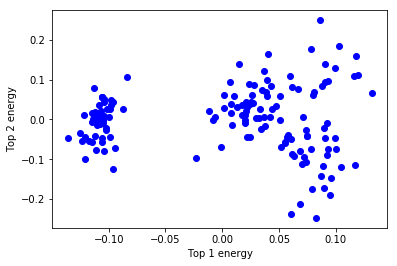

In [2]:
if __name__=='__main__':
    from sklearn.decomposition import FastICA
    ica=FastICA(n_components=4)
    X_ica = ica.fit_transform(X)

    import numpy as np
    energy = [np.sum(X_ica[:, i]**2) for i in range(4)]
    idx = np.argsort(energy)[::-1]
    X_ica_top2_energy = list()
    for x in X_ica:
        X_ica_top2_energy.append([x[idx[0]], x[idx[1]]])
    X_ica_top2_energy = np.array(X_ica_top2_energy)

    import import_ipynb
    from HW2 import plotData
    # print data info after ICA
    plotData(X_ica_top2_energy, 'Top 1 energy', 'Top 2 energy')

3-NN 10 Times

3-NN result


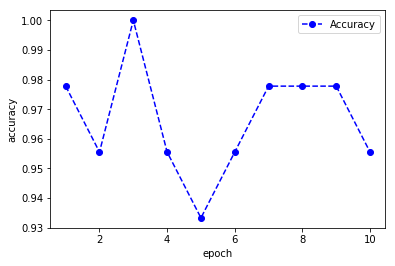

average acc:0.9666666666666666
varance of acc:0.0003209876543209869


In [3]:
if __name__=='__main__':
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import random

    # create model
    acc = list()
    for i in range(10):
        # spilt data randomly
        X_train, X_test, y_train, y_test = train_test_split(X_ica_top2_energy, y, test_size = 0.3,\
                                                            random_state=random.randint(0, 100))
        # create model
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        # predict data
        y_pred = knn.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, y_pred))

    # plot & print th result
    print('3-NN result')
    plt.plot(range(1, 11), acc, 'ob--', label = 'Accuracy')
    plt.legend()
    plt.xlabel('epoch') 
    plt.ylabel('accuracy')
    plt.show()
    print('average acc:' + str(np.mean(acc)))
    print('varance of acc:' + str(np.var(acc)))

**2. We learned the k-means for clustering in the lecture. Implement the algorithm with the Iris dataset. In this problem, we know k = 3. Use the first sample in each class as the initial cluster center to do the clustering. Remember that the cluster centers are points in 4-dimensional space. To have a unique answer, use the same
sequence given in the dataset to feed into your program. That is, do not shuffler the dataset. Once your program converges, (a) print out the coordinates of the cluster centers, (b) and the number of members (sample points) in each cluster. (c) According to the labels of data samples, how many of them are placed in wrong
clusters? Use a majority vote to determine the label of each cluster.**

Cluster centers:
Class 1:[5.006 3.418 1.464 0.244]
Class 2:[5.9016129  2.7483871  4.39354839 1.43387097]
Class 3:[6.85       3.07368421 5.74210526 2.07105263]

Number of cluster-members:
Class 1:50
Class 2:62
Class 3:38

{'Class 1': 'Iris-setosa', 'Class 2': 'Iris-versicolor', 'Class 3': 'Iris-virginica'}


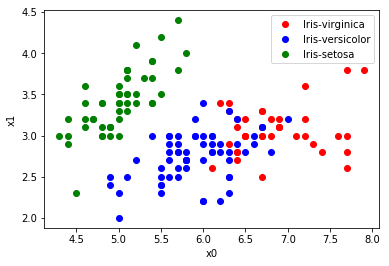

In [4]:
if __name__=='__main__':
    # Initial cluster center
    cluster_centers = [[X[0], 'Class 1'], [X[50], 'Class 2'], [X[100], 'Class 3']]

    # Initial result array
    result = ['']*150


    # k-means
    inner_distance, epoch = np.array([np.nan]*3), 0
    while True:
        epoch+=1
        for i, x in enumerate(X):
            distance = [np.sum((x-cluster_center[0])**2) for cluster_center in cluster_centers]
            class_idx = distance.index(np.min(distance))
            result[i] = cluster_centers[class_idx][1]
        for cluster_center in cluster_centers:
            cluster_center[0] = np.mean([x for i, x in enumerate(X) if result[i]==cluster_center[1]], axis=0)
        # Stop creatia
        _pre_inner_distance = np.array(inner_distance)
        for i, cluster_center in enumerate(cluster_centers):
            inner_distance[i] = np.sum([np.square(x-cluster_center[0]) for i, x in enumerate(X) if result[i]==cluster_center[1]])
        if(np.abs(np.sum(_pre_inner_distance)-np.sum(inner_distance))<0.1):
            break

    # print cluster center
    print('Cluster centers:')
    for cluster_center in cluster_centers:
        print(str(cluster_center[1])+':'+str(cluster_center[0]))
    print()

    # print cluster count
    print('Number of cluster-members:')
    for cluster_center in cluster_centers:
        print(str(cluster_center[1])+':'+str(len([x for i, x in enumerate(X) if result[i]==cluster_center[1]])))
    print()

    # voting class name
    classDict = {}
    for cluster_center in cluster_centers:
        Cluster = [y[i] for i, x in enumerate(X) if result[i]==cluster_center[1]]
        count = sorted([[Cluster.count(c), c] for c in set(Cluster)], reverse=True)
        classDict[cluster_center[1]] = count[0][1]
    print(classDict)
    
    style = ['or', 'ob', 'og']
    for i, cla in enumerate(set(y)):
        X_plot = [x[0] for idx, x in enumerate(X) if classDict[result[idx]]==cla]
        Y_plot = [x[1] for idx, x in enumerate(X) if classDict[result[idx]]==cla]
        plt.plot(X_plot, Y_plot, style[i], label = cla)
    plt.legend()
    plt.xlabel('x0') 
    plt.ylabel('x1')
    plt.show()

**3. We know that the GMM can be viewed as a “soft” clustering method. To simplify the difficulty level, we will implement the univariate GMM. Use the third feature (petal length) as the input to your GMM. The settings are three
Gaussians with the following initial values: μ1 = 1, μ2 = 4, μ3 = 6, σ1^2 = σ2^2 = σ3^2 = 1, α1 = 0.5, α2 = α3 = 0.25. To have a unique answer, iterate the EM steps 3,000 times (epochs). (a) Print out the GMM parameters. (b) If you want to convert the “soft” clustering results to “hard” clustering ones, how do you do it? (c) Use your method in (b) to find the number of members in each cluster.**

**4. We used the play/no play example in the lecture. You are required to write a program to compute the C 4.5 decision tree with the “play/no play” data given in the PPT file. Plot the computed decision tree. In this problem, you need to convert continuous variables of temperature and humidity to discrete values according to the rules given in the PPT file.**

**5. Based on your C4.5 program on problem 4, revise it to accept continuous values of temperature and humidity. Inside your program, there must be a routine to convert each continuous number into three values, namely, low, mid, and high, based on maximizing gains. (a) Use a pseudo code to explain how to perform the computation. (b) Run your program to print out the conversion rules (such as temperature greater than xx is hot) and (c) draw the decision tree.**